# Reading lif files
____

In [ ]:
! pip install readlif aicsimageio

In [1]:
# to read lif files
from readlif.reader import LifFile
from aicsimageio import AICSImage
from aicsimageio.writers import OmeTiffWriter

# To read paths
import pathlib
from pathlib import Path
from pathlib import Path, PureWindowsPath, PurePosixPath


import matplotlib.pyplot as plt
import numpy as np

In [3]:
def is_windows_path(path_str):
    return ':' in path_str or '\\' in path_str

def is_posix_path(path_str):
    return '/' in path_str


In [7]:
user_provided_path = '/Users/nzlab-la/Library/CloudStorage/OneDrive-TheUniversityofColoradoDenver/General - Zhao (NZ) Lab/Microscope/Luis Aguilera/Live cell imaging_Folding & Nascent chains/20240801 pNZ212 and pRS001_JF646_NoDelay_ch0 folding_ch1 nascent chains.lif'

if is_windows_path(user_provided_path):
    pure_path = PureWindowsPath(user_provided_path)
else:
    pure_path = PurePosixPath(user_provided_path)

path_components = pure_path.parts
data_folder_path = Path(*path_components)

In [9]:

#lif_image = LifFile(data_folder_path)  
#lif_image.xml_header      
#https://allencellmodeling.github.io/aicsimageio/index.html 
images = AICSImage(data_folder_path) # selects the first scene found
images.set_scene(1)
number_scenes = len(images.scenes)
# images.channel_names  # returns a list of string channel names found in the metadata
# images.physical_pixel_sizes.Z  # returns the Z dimension pixel size as found in the metadata
# images.physical_pixel_sizes.Y  # returns the Y dimension pixel size as found in the metadata
# images.physical_pixel_sizes.X  # returns the X dimension pixel size as found in the metadata
number_color_channels = len(images.channel_names)


In [10]:
# Print the metadata
print('Number of scenes:', number_scenes)
print('Dimensions order:', images.dims.order)
print(images.dims)
print('Channel names:',  images.channel_names)
print('Physical pixel size Z: ', images.physical_pixel_sizes.Z)
print('Physical pixel size XY:', images.physical_pixel_sizes.X)
print('Data type:', images.dtype)
images.get_image_data("TCZYX").shape #XYCZTS  

Number of scenes: 10
Dimensions order: TCZYX
<Dimensions [T: 20, C: 2, Z: 9, Y: 512, X: 512]>
Channel names: ['Green', 'Red']
Physical pixel size Z:  0.29850037500000004
Physical pixel size XY: 0.12989318982387477
Data type: uint16


(20, 2, 9, 512, 512)

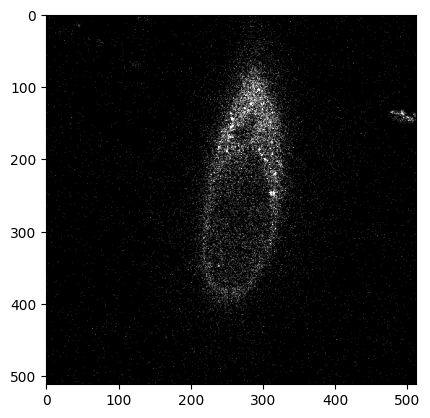

In [11]:
# plotting the image 
image_data = images.get_image_data("TCZYX")
# selecting a section
selected_color_channel = 1
selecting_section = image_data[0,selected_color_channel,4,:,:]
vmax = np.percentile(selecting_section, 99.9)
plt.imshow(selecting_section, cmap='gray',vmax=vmax)
plt.show()